# Clasificador Naive Bayes

In [ ]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [23]:
df = pd.read_csv("dataEtiquetada.csv")
df['content'] = df['content'].str.lower()
df.head(5)

,media_outlet,url,title,text,content,topic,label,terms,most_common,second_common
0,biobiochile,https://www.biobiochile.cl/noticias/nacional/r...,Incendio consume galería comercial en pleno ce...,Un gran incendio se registró esta mañana en el...,incendio consume galería comercial en pleno ce...,nacional,catástrofes y accidentes,galería comercial; locales afectados; locales ...,locales comerciales,casa arroyo
1,ahoranoticiasmega,https://www.meganoticias.cl/nacional/312717-te...,SHOA descarta riesgo de tsunami en las costas ...,La Oficina Nacional de Emergencia (Onemi) info...,shoa descarta riesgo de tsunami en las costas ...,nacional,catástrofes y accidentes,riesgo de tsunami; temblor registrado; condici...,condiciones necesarias,riesgo de tsunami
2,biobiochile,https://www.biobiochile.cl/noticias/nacional/r...,Conaf advierte y se prepara para una compleja ...,Una temporada compleja por los incendios fores...,conaf advierte y se prepara para una compleja ...,nacional,catástrofes y accidentes,incendios forestales; temporada compleja; ince...,incendios forestales,temporada compleja
3,ahoranoticiasmega,https://www.meganoticias.cl/tendencias/321629-...,Henry Cavill sufre accidente durante rodaje de...,Fue durante el rodaje de la segunda temporada ...,henry cavill sufre accidente durante rodaje de...,tendencias,catástrofes y accidentes,estrella principal; periodo de tiempo; “de rep...,this post,estrella principal
4,biobiochile,https://www.biobiochile.cl/noticias/nacional/r...,Incendio Camanchaca: Causa preliminar serían t...,Un devastador incendio afectó a la pesquera Ca...,incendio camanchaca: causa preliminar serían t...,nacional,catástrofes y accidentes,incendio camanchaca; causa preliminar; trabajo...,pesquera camanchaca,sumario sanitario


In [15]:
import nltk
#nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')

In [16]:
import string
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
def text_cleaning(text):
    remove_punctuation = [char for char in text if char not in string.punctuation]
    remove_punctuation = "".join(remove_punctuation)  
    return [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('spanish')]

In [25]:
print(df['content'].apply(text_cleaning))

0        [incendio, consume, galería, comercial, pleno,...
1        [shoa, descarta, riesgo, tsunami, costas, país...
2        [conaf, advierte, prepara, compleja, temporada...
3        [henry, cavill, sufre, accidente, rodaje, segu...
4        [incendio, camanchaca, causa, preliminar, trab...
                               ...                        
20423    [detectan, biobío, seis, personas, variantes, ...
20424    [toda, rm, cumple, mes, cuarentena, 32, comuna...
20425    [10, comunas, mil, casos, activos, chile, mita...
20426    [informe, epidemiológico, región, metropolitan...
20427    [paris, destaca, caída, moderada, casos, advie...
Name: content, Length: 20428, dtype: object


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_cleaning).fit(df['content'])
content_bow = bow_transformer.transform(df['content'])

TF-IDF algorithm: term frequency - inverse document frequency to know the most significant words


In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(content_bow)
content_tfidf = tfidf_transformer.transform(content_bow)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(content_tfidf, df['label'], test_size=0.3)

In [31]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train,y_train)


In [34]:
from sklearn import metrics
pred = model.predict(X_test)
print(pred)

print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred, average='micro'))
print("Recall:",metrics.recall_score(y_test, pred, average='micro'))

['economía' 'ciencia y tecnología' 'crimen, delitos y justicia' ...
 'deporte' 'deporte' 'política y conflictos']
Accuracy: 0.8347201827378039
Precision: 0.8347201827378039
Recall: 0.8347201827378039


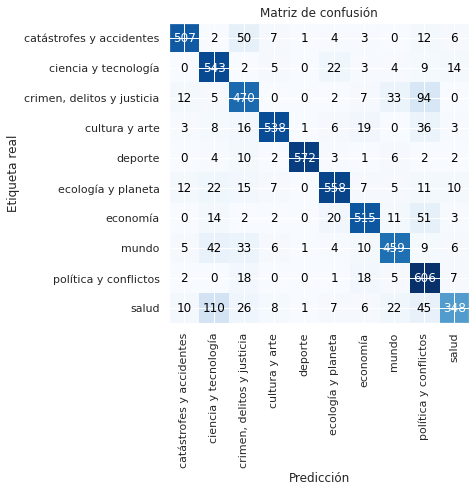

                            precision    recall  f1-score   support

  catástrofes y accidentes      0.920     0.856     0.887       592
      ciencia y tecnología      0.724     0.902     0.803       602
crimen, delitos y justicia      0.732     0.754     0.743       623
            cultura y arte      0.936     0.854     0.893       630
                   deporte      0.993     0.950     0.971       602
        ecología y planeta      0.890     0.862     0.876       647
                  economía      0.874     0.833     0.853       618
                     mundo      0.842     0.798     0.820       575
     política y conflictos      0.693     0.922     0.791       657
                     salud      0.872     0.597     0.709       583

                  accuracy                          0.835      6129
                 macro avg      0.848     0.833     0.835      6129
              weighted avg      0.846     0.835     0.835      6129



In [36]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation='vertical')
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')
    plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=pred)
plot_confusion_matrix(cm, labels=list(df['label'].unique()))
print(classification_report(y_test, pred, digits=3))